### 1.Define the problem:

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.


In [1]:
import warnings
warnings.filterwarnings("ignore")

#Libraries for data computation and data manipulation
import pandas as pd
import numpy as np

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Libraries to split train test data, perform metrics and to tune data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    f1_score, 
    precision_recall_curve, 
    average_precision_score, 
    plot_precision_recall_curve)
from sklearn.pipeline import Pipeline, make_pipeline

#Libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier,
    AdaBoostClassifier)
from xgboost import XGBClassifier


### Load dataset

In [2]:
train_data = pd.read_csv("new_train.csv")
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### 2. Discover

### Explore  and Clean the data - Data Preprocessing and Explanatory Data Analysis

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


- There are 15 columns and total of 32950 observation in the dataset.
- There is no missing values.
- The dataset contains the mix of categorical and numerical features.

In [4]:
# Statistic summary of numeric features
train_data.describe(include = [np.number])

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [5]:
# Statistic summary of categorical features
train_data.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


In [6]:
# Checking for duplicates
train_data[train_data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
24831,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,no
28456,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,no
29543,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,no
30807,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,no
32607,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,no


In [7]:
# Dropped the duplicates - by default will keep the first occurence and drop the duplicates
train_data.drop_duplicates(inplace=True)

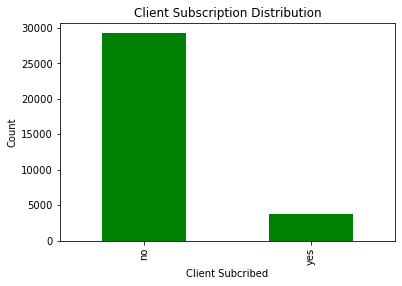

In [8]:
# Checking the dependent variable
target_count=pd.value_counts(train_data['y'],sort=True)
target_count.plot(kind='bar', color="Green")
plt.title("Client Subscription Distribution")
plt.xlabel("Client Subcribed")
plt.ylabel("Count")
plt.savefig("images/Client_subscription_desc.png")

In [9]:
# Checkcing for imbalance dataset
count = train_data['y'].value_counts()
perc=train_data['y'].value_counts(normalize=True)
pd.concat([count, perc], axis=1, keys=['Count', '%'] )

,Count,%
no,29230,0.887317
yes,3712,0.112683


The target variable contains the data with the ratio of 89% "NO" to 11% "Yes", which is highly imbalanced dataset. We will handle it later.
- In general techniques used to handle imbalance datasets are,
    * Undersampling
    * Oversampling
    * SMOTE

In [10]:
#subset dataset with y-"yes" for Data Analysis as our main focus is who responded to the campaign.
data_sub=train_data[train_data['y']=='yes']
data_sub.shape

(3712, 16)

#### Exploring the numerical features

In [11]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

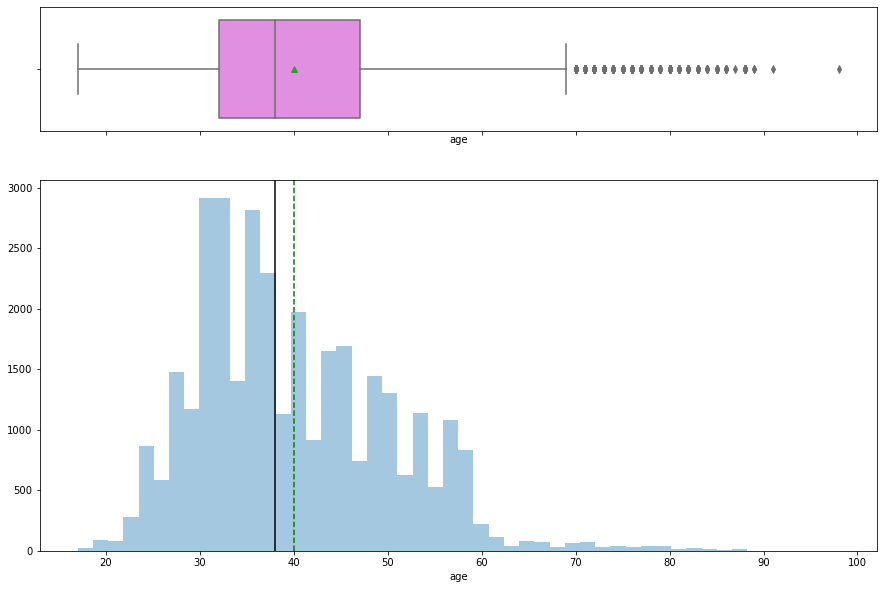

In [12]:
# Observations on age
histogram_boxplot(train_data["age"])
plt.savefig("images/age.png")

- The data is right skewed to see extreme outliers.
- undeserved age category to be less than 20 years or age older than 60.

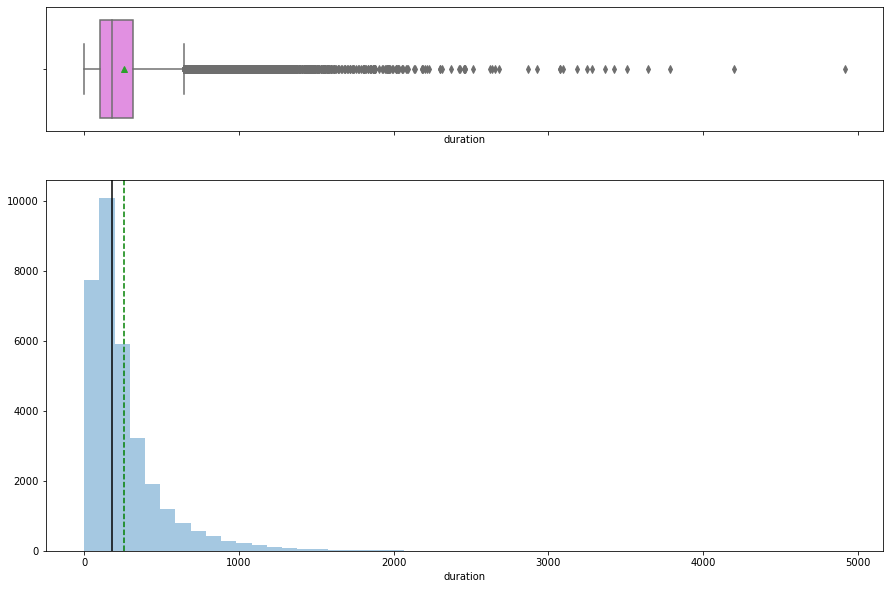

In [13]:
histogram_boxplot(train_data["duration"])
plt.savefig("images/duration.png")

* The duration seems to the right skewed with ouliers.
* The mean duration for a call is 180 mins.

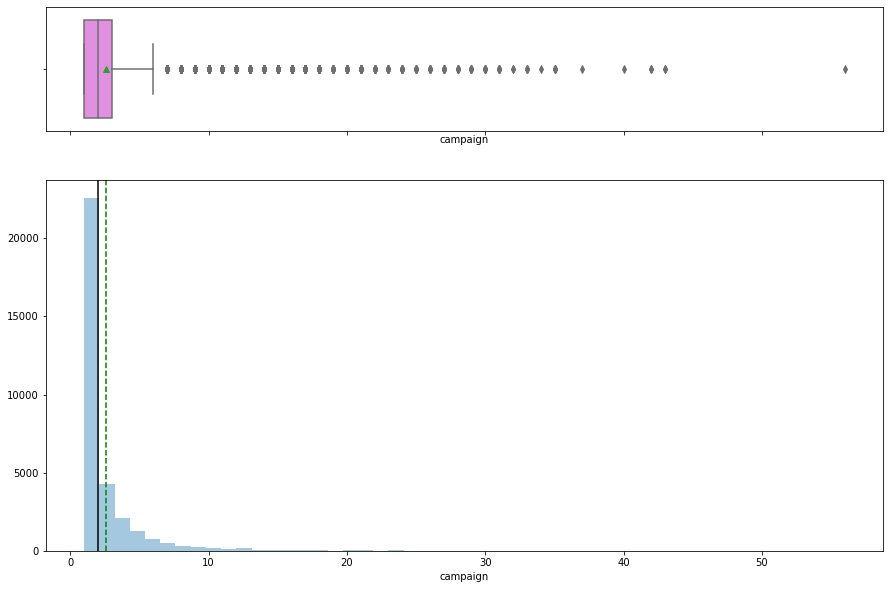

In [14]:
histogram_boxplot(train_data["campaign"])

#### Exploring the categorical features in terms of dependent variable.

In [15]:
#Exploring the features with dependent variable,

def feature_depend(df, feature):
    #df[feature] = df[feature].astype("category")
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.title("{} versus client subsribed for term deposit".format(feature))
    plt.xlabel(feature)
    plt.ylabel("Number of client")
    plt.xticks(rotation=45)
    

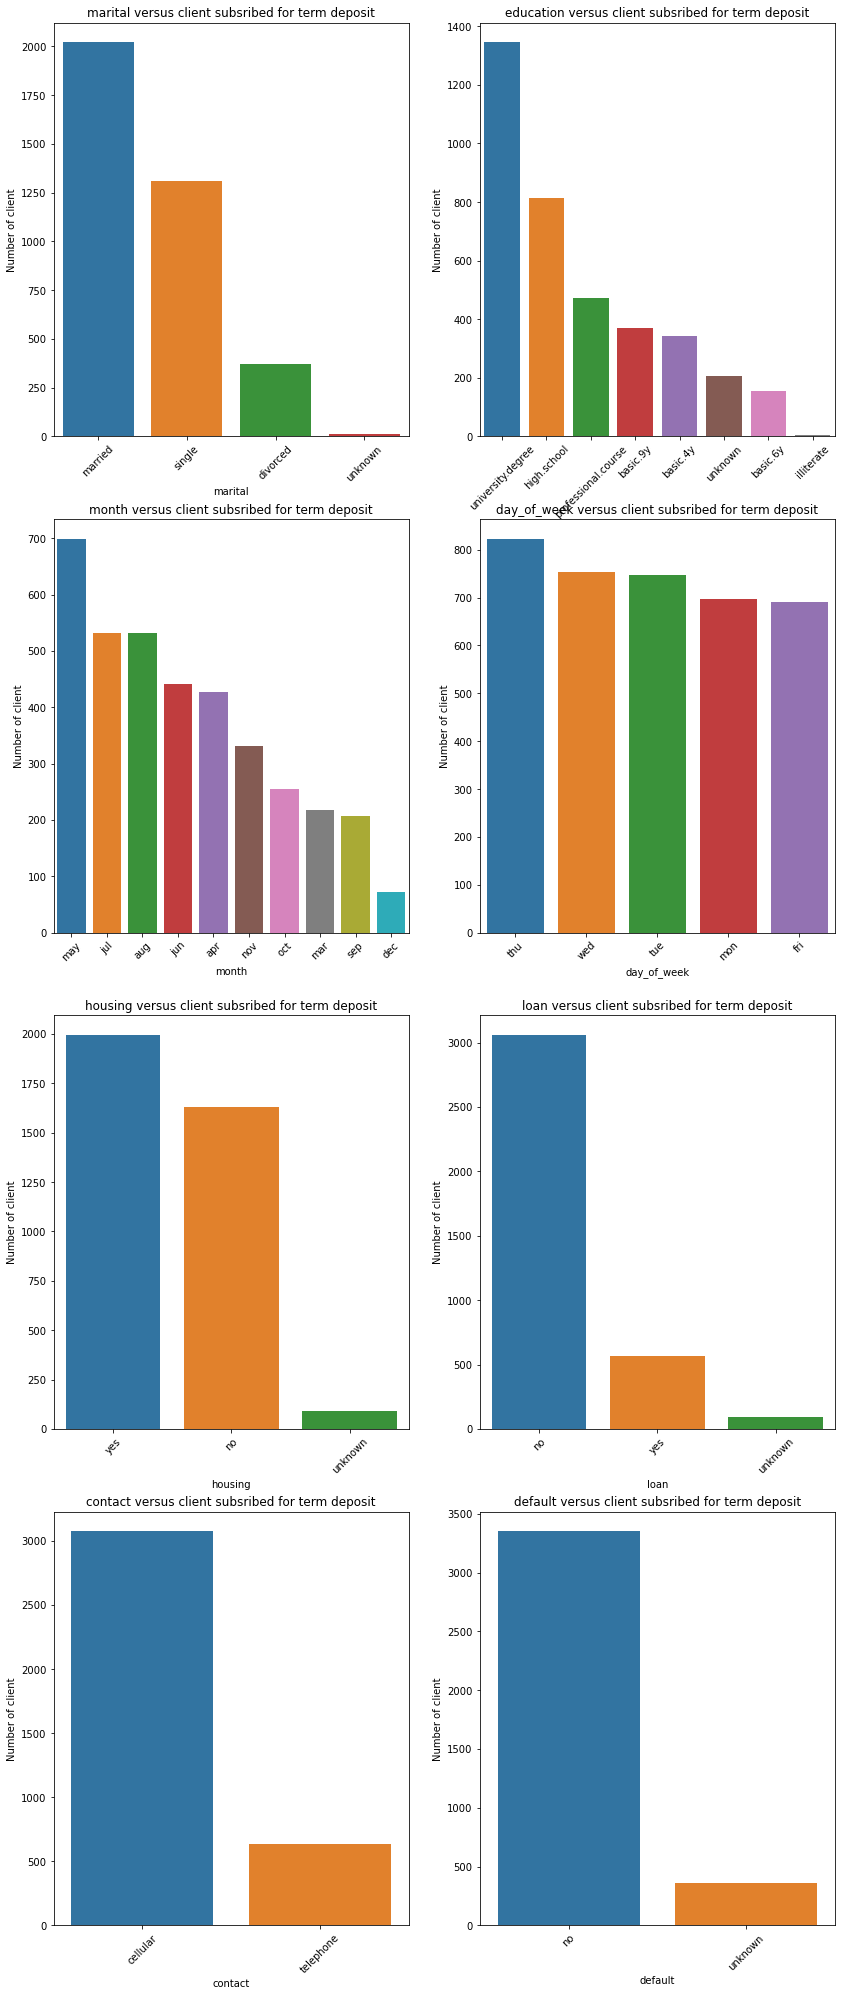

In [16]:
cat_column = ['marital', 'education', 'month','day_of_week', 'housing','loan','contact', 'default']
i=4
j=2
k=1
plt.figure(figsize=(14,35))
for feature in cat_column:
    plt.subplot(i, j, k)
    k=k+1
    feature_depend(data_sub, feature) 
    plt.savefig("images/"+feature+".png")

- The pattern from each category who all agreed to term deposits are, married people, people with university degree, who having housing loans, mostly who have been called in the middle of the week days, mostly in May, July and August.
- There is an additional category called "unknown" in most of the features which can be missing values that need to be addressed.

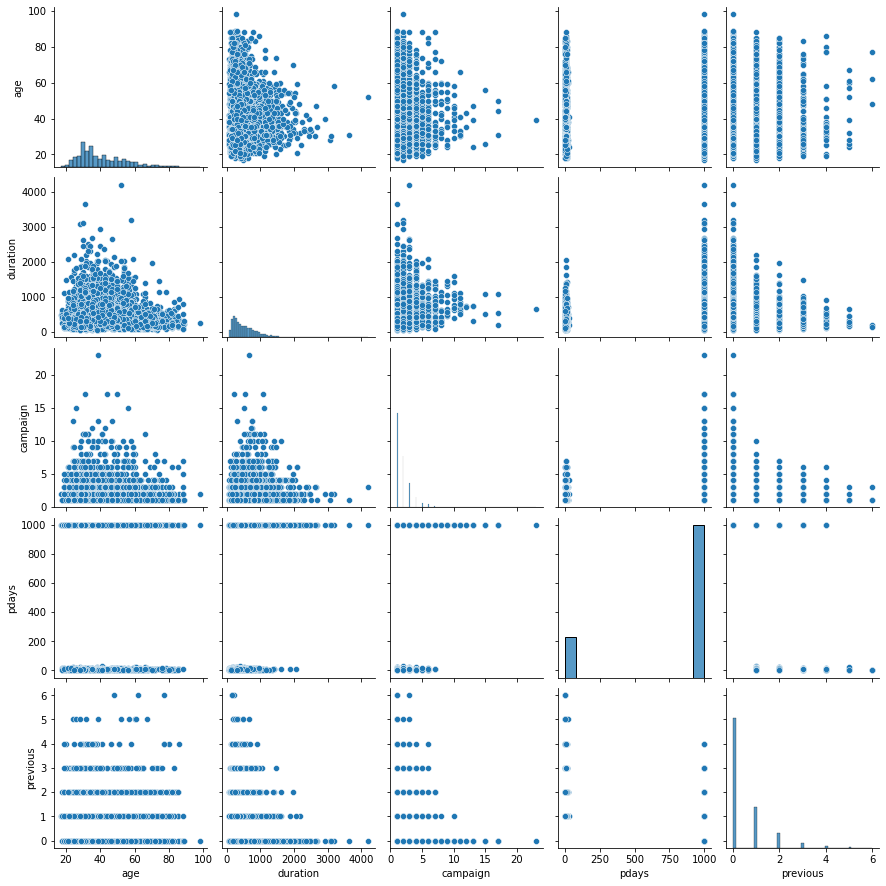

In [17]:
sns.pairplot(data_sub)
plt.savefig("images/pairplot.png")

From pairplot, it shows that the duration and the campaign mostly focused on younger people and skewed down as the age goes up, as per the data description values (pdays=999) means was not contacted before - Ignoring that, whomever was contacted was done with in the last 30 days. In most cases the number of times contacted before a campaign was < 6 times.

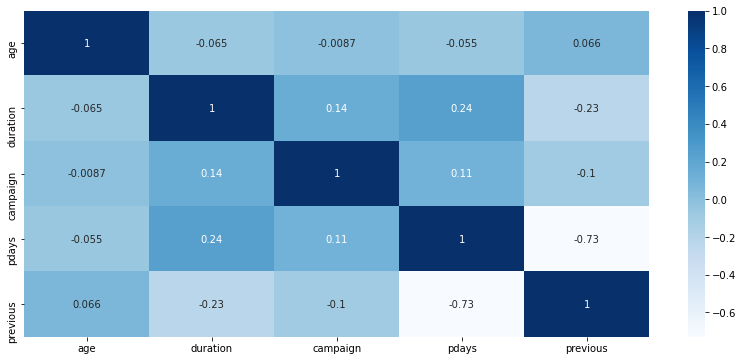

In [18]:
corrmat = data_sub.corr()
corr_index =corrmat.index
plt.figure(figsize=(14,6))
ax=sns.heatmap(data_sub[corr_index].corr(), annot=True, cmap='Blues')
plt.savefig("images/corr.png")

#### Converting the object type to category

In [19]:
catobj_column = [
    'job',
    'marital', 
    'education', 
    'month',
    'day_of_week', 
    'housing',
    'loan',
    'contact', 
    'default',
    'poutcome',
    'y']
for column in catobj_column:
    train_data[column]=train_data[column].astype('category')
train_data.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32942 non-null  int64   
 1   job          32942 non-null  category
 2   marital      32942 non-null  category
 3   education    32942 non-null  category
 4   default      32942 non-null  category
 5   housing      32942 non-null  category
 6   loan         32942 non-null  category
 7   contact      32942 non-null  category
 8   month        32942 non-null  category
 9   day_of_week  32942 non-null  category
 10  duration     32942 non-null  int64   
 11  campaign     32942 non-null  int64   
 12  pdays        32942 non-null  int64   
 13  previous     32942 non-null  int64   
 14  poutcome     32942 non-null  category
 15  y            32942 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.9 MB


In [20]:
# Looking for each of unique category in every categorical features
cat_column = [
    'marital', 
    'education', 
    'month',
    'day_of_week', 
    'housing',
    'loan',
    'contact', 
    'default',
    'poutcome',
    'y']
for column in cat_column:
    print(train_data[column].value_counts())
    print('*'*30)

married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64
******************************
university.degree      9733
high.school            7594
basic.9y               4826
professional.course    4191
basic.4y               3322
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64
******************************
may    11009
jul     5761
aug     4946
jun     4247
nov     3265
apr     2085
oct      586
sep      464
mar      436
dec      143
Name: month, dtype: int64
******************************
thu    6854
mon    6811
wed    6515
tue    6441
fri    6321
Name: day_of_week, dtype: int64
******************************
yes        17251
no         14895
unknown      796
Name: housing, dtype: int64
******************************
no         27123
yes         5023
unknown      796
Name: loan, dtype: int64
******************************
cellular     20903
telephone    12039
Name: contact, dtyp

From the above listed categorical variables it shows that five of the features have a unique category type "unknown" as noticed in visualization. Replacing "unknown" to "Nan", so to handle those "unknown" as missing values.

In [21]:
#Replaced the value 'unknown' to NAN for data cleaning.
train_data.replace({'unknown':np.nan}, inplace=True)

In [22]:
train_data.isna().sum()

age               0
job             265
marital          65
education      1396
default        6939
housing         796
loan            796
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [23]:
# Based on frquency, checking the value count for "Default" variable - this is if the cilent have credit or not. 
print(train_data['default'].value_counts())
train_data.drop('default', axis=1, inplace=True)

no     26000
yes        3
Name: default, dtype: int64


Since the default variable is highly imbalance and with high number of null values, will drop that column

In [24]:
# These are the data "MISSING AT RANDOM" - cilent refused to answer their loan information -Which is around 795 out of 
# approx 33000 thats is around 2.4% of the data - decided to drop thoses rows with nulls, but the data usually 
# have a relationship with the target variables, so impute with mean/median/mode imputation.

### Impute the missing values with mode

In [25]:
def impute_cat_mode(df, variable):
    most_freq_cat=df[variable].mode()[0]
    df[variable].fillna(most_freq_cat, inplace=True)
    

In [26]:
impute_cols= train_data[['job', 'marital', 'education', 'housing', 'loan']]
for col in impute_cols:
    impute_cat_mode(train_data, col)    

In [27]:
train_data.isna().sum()

age            0
job            0
marital        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Feature Engineering

In [28]:
#Label Encoding - Months, Weekdays, 
month_dict={'dec':0, 'sep':1,'mar':2, 'oct':3, 'nov':4, 'apr':5, 'jun':6, 'aug':7, 'jul':8, 'may':9}
day_of_week_dict={'fri':0, 'mon':1, 'tue':2, 'wed':3, 'thu':4}
poutcome_dict={'failure':0, 'nonexistent':1, 'success':2}

In [29]:
train_data['month_ordinal']=train_data['month'].map(month_dict)
train_data['weekday_ordinal']=train_data['day_of_week'].map(day_of_week_dict)
train_data['poutcome_ordinal']=train_data['poutcome'].map(poutcome_dict)

In [30]:
train_data['pdays'].replace({999: 0}, inplace=True)

In [31]:
train_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,month_ordinal,weekday_ordinal,poutcome_ordinal
0,49,blue-collar,married,basic.9y,no,no,cellular,nov,wed,227,4,0,0,nonexistent,no,4,3,1
1,37,entrepreneur,married,university.degree,no,no,telephone,nov,wed,202,2,0,1,failure,no,4,3,0
2,78,retired,married,basic.4y,no,no,cellular,jul,mon,1148,1,0,0,nonexistent,yes,8,1,1
3,36,admin.,married,university.degree,yes,no,telephone,may,mon,120,2,0,0,nonexistent,no,9,1,1
4,59,retired,divorced,university.degree,no,no,cellular,jun,tue,368,2,0,0,nonexistent,no,6,2,1


In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
train_data['job_encoding']=labelencoder.fit_transform(train_data['job'])
train_data['education_encoding']=labelencoder.fit_transform(train_data['education'])
train_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,month_ordinal,weekday_ordinal,poutcome_ordinal,job_encoding,education_encoding
0,49,blue-collar,married,basic.9y,no,no,cellular,nov,wed,227,4,0,0,nonexistent,no,4,3,1,1,2
1,37,entrepreneur,married,university.degree,no,no,telephone,nov,wed,202,2,0,1,failure,no,4,3,0,2,6
2,78,retired,married,basic.4y,no,no,cellular,jul,mon,1148,1,0,0,nonexistent,yes,8,1,1,5,0
3,36,admin.,married,university.degree,yes,no,telephone,may,mon,120,2,0,0,nonexistent,no,9,1,1,0,6
4,59,retired,divorced,university.degree,no,no,cellular,jun,tue,368,2,0,0,nonexistent,no,6,2,1,5,6


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 32942 non-null  int64   
 1   job                 32942 non-null  category
 2   marital             32942 non-null  category
 3   education           32942 non-null  category
 4   housing             32942 non-null  category
 5   loan                32942 non-null  category
 6   contact             32942 non-null  category
 7   month               32942 non-null  category
 8   day_of_week         32942 non-null  category
 9   duration            32942 non-null  int64   
 10  campaign            32942 non-null  int64   
 11  pdays               32942 non-null  int64   
 12  previous            32942 non-null  int64   
 13  poutcome            32942 non-null  category
 14  y                   32942 non-null  category
 15  month_ordinal       32942 non-null  

In [34]:
one_hot_cols=['marital','housing','loan','contact','poutcome']
train_data_dum = pd.get_dummies(train_data[one_hot_cols], drop_first=True)
train_data_dum.head()

,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0
3,1,0,1,0,1,1,0
4,0,0,0,0,0,1,0


In [35]:
train_df = train_data.copy()
train_df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,month_ordinal,weekday_ordinal,poutcome_ordinal,job_encoding,education_encoding
0,49,blue-collar,married,basic.9y,no,no,cellular,nov,wed,227,4,0,0,nonexistent,no,4,3,1,1,2
1,37,entrepreneur,married,university.degree,no,no,telephone,nov,wed,202,2,0,1,failure,no,4,3,0,2,6
2,78,retired,married,basic.4y,no,no,cellular,jul,mon,1148,1,0,0,nonexistent,yes,8,1,1,5,0
3,36,admin.,married,university.degree,yes,no,telephone,may,mon,120,2,0,0,nonexistent,no,9,1,1,0,6
4,59,retired,divorced,university.degree,no,no,cellular,jun,tue,368,2,0,0,nonexistent,no,6,2,1,5,6


In [36]:
cols=['job','marital','housing','loan','contact','poutcome','month', 'day_of_week', 'education']
train_df.drop(cols, axis=1, inplace=True)

In [37]:
train_df.head()

,age,duration,campaign,pdays,previous,y,month_ordinal,weekday_ordinal,poutcome_ordinal,job_encoding,education_encoding
0,49,227,4,0,0,no,4,3,1,1,2
1,37,202,2,0,1,no,4,3,0,2,6
2,78,1148,1,0,0,yes,8,1,1,5,0
3,36,120,2,0,0,no,9,1,1,0,6
4,59,368,2,0,0,no,6,2,1,5,6


In [38]:
train_df['y']=np.where(train_df['y']=='yes',1,0)

In [39]:
X = pd.concat([train_df, train_data_dum], axis=1)
X.drop(['y'],axis=1, inplace=True)
X.head()

,age,duration,campaign,pdays,previous,month_ordinal,weekday_ordinal,poutcome_ordinal,job_encoding,education_encoding,marital_married,marital_single,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,49,227,4,0,0,4,3,1,1,2,1,0,0,0,0,1,0
1,37,202,2,0,1,4,3,0,2,6,1,0,0,0,1,0,0
2,78,1148,1,0,0,8,1,1,5,0,1,0,0,0,0,1,0
3,36,120,2,0,0,9,1,1,0,6,1,0,1,0,1,1,0
4,59,368,2,0,0,6,2,1,5,6,0,0,0,0,0,1,0


In [40]:
y=train_df['y']

In [41]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Model Evaluation Criteria and Metrics:

On any classification problem the main goal is to minimize the false positive(precision) and false negative(recall) rate.

#### Model Performance Caveat:

1. Classified as the customer will agree for the deposit term and the customer doesn't - Loss of resources - False Positive 
2. Classified as the customer will not agree for the deposit term and the possibility he/she does - Loss of opportunity - False Negative

Both the classes are important in this model to minimize the resource spent and maximize the opportunity given in order to maximize the profit. 

Metrics to satisfy our needs of measures are  - F1 beta score ( where the threshold is set to 1(f1 score) as focusses on both recall and precision)
and PR AUC

In [42]:
def predict_measure_metrics(model, train, test, train_y, test_y):
    # Initialize the empty list to store the scores
    score_list = []
    
    model_fit = model.fit(train, train_y)
    pred = model_fit.predict(test)
    
    f1_s = f1_score(test_y, pred)
    avg_pre = average_precision_score(test_y, pred)
    
    print("Model: {}".format(model))
    print("*"*40)
    print("F1 Score: {}".format(f1_s))
    print("Avg precision Recall Score: {}".format(avg_pre))
        
    score_list.extend((f1_s, avg_pre ))
            

### Created a baseline model using Logistic Regression with imbalance dataset

In [43]:
logR=LogisticRegression()

In [44]:
predict_measure_metrics(logR, X_train, X_test, y_train, y_test)

Model: LogisticRegression()
****************************************
F1 Score: 0.396280400572246
Avg precision Recall Score: 0.2613332852897653


Logistic regression with imbalanced dataset - Both F1 score and the average precision recall score is very poor -less that 40%.
Lets see if the model performance can be improved by handling imbalanced dataset, Technique to use -

    1. Undersampling - Deleted the majority cases to match with minority.
    2. Oversampling - Create more data points on top of existing data points in order to attain balanced target data
    3. Oversampling using SMOTE - Create more data points in reference with similar data points using KNN.
    
Here I used Oversampling with SMOTETOMEK technique.    

### Due to imbalance dataset, using oversampling with SMOTETOMEK technique to handle imbalance dataset.


In [45]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [46]:
# used SMOTE technique to match atleast 75%.
sm=SMOTETomek(0.75)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print("The value of sample before fit {}".format(Counter(y_train)))
print("The value of sample after fit {}".format(Counter(y_train_sm)))

The value of sample before fit Counter({0: 21942, 1: 2764})
The value of sample after fit Counter({0: 21795, 1: 16309})


In [47]:
# using the new balanced data set on the logistic regression that was used in baseline model
predict_measure_metrics(logR, X_train_sm, X_test, y_train_sm, y_test)

Model: LogisticRegression()
****************************************
F1 Score: 0.5174043833261711
Avg precision Recall Score: 0.31922801650398674


Fixing the imbalance dataset made an improvement in model performance. Will build different model using cross validation to find the best model.

### Build different classification model using KFolds and cross_val_score with pipelines, 

In [48]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)


results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_sm, y=y_train_sm, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LR: 85.17840322288188


<IPython.core.display.Javascript object>

DTREE: 88.65088496891975


<IPython.core.display.Javascript object>

RF: 92.33505424235793


<IPython.core.display.Javascript object>

GBM: 88.78024157435873


<IPython.core.display.Javascript object>

XGB: 91.59717976725904


#### Model performance comparision.

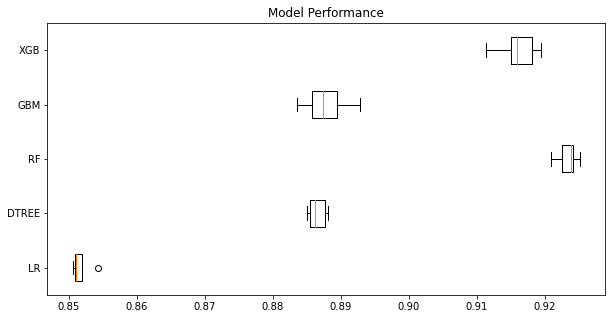

In [49]:
# Compare Model Performance
fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(111)

plt.title("Model Performance")
plt.boxplot(results, vert=0)
ax.set_yticklabels(names)
plt.savefig("images/Model_comparision.png")

plt.show()

From the above chart, we can say the best two models are RandomForestClassifier and XGBoost, will tune these models to improve the performance.

### Feature Selection

In [50]:
from sklearn.ensemble import ExtraTreesRegressor

In [51]:
selection = ExtraTreesRegressor()
selection.fit(X_train_sm, y_train_sm)

ExtraTreesRegressor()

In [52]:
selection.feature_importances_

array([0.06413932, 0.29063878, 0.0323081 , 0.01539747, 0.03375622,
       0.1280178 , 0.03867432, 0.02424872, 0.03789283, 0.03629265,
       0.02276588, 0.0219516 , 0.02747241, 0.01469592, 0.13165169,
       0.07808677, 0.0020095 ])

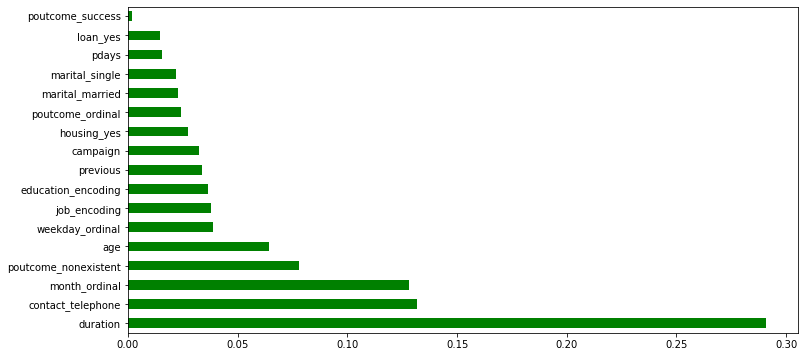

In [53]:
plt.figure(figsize = (12,6))
feat_import = pd.Series(selection.feature_importances_, index = X.columns)
feat_import.nlargest(20).plot(kind='barh', color="Green")
plt.savefig("images/feature_importance.png")
plt.show()

* Based on feature importance, the most important feature is the call duration, it it critical duration='0' means in default customer response = "No".
* Next important feature is phone campaign, in general by talking to the customer can relate what their business needs and is easy for sales person to achieve the goal.
* The other two important features are month and poutcome_nonexistent, the month really maters to perform the campaign and if the customer did not exist during the previous campaign is a possiblility for a "yes"

### Recommendation

* Perform most of the campaign during summer month, when customer is more relaxed and the response rate is higher.
* Contacting customer through phone and targetting the age group (middle age) makes a comparative difference.
 